Declaration: The symbol $ is used one or two times in the project. One friend told me about this in the third week of this course (when I learned wrangling chapter), who is currently in the second year with a stats major.

Individual_Planning_Report_For_QUESTION_2:

"We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts."

Part 1. Setup and Data Loading

Idea for this part: Loading data is as the foundation for my entire later analysis. By examining the rough structure and dimensions of the both datasets, knowing what they look like, we get some important insights about the project. 

In [9]:
# Load library
library(tidyverse)
library(readr)

# Load the data files
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

# Initial exploration
print("Players dataset dimensions:")
dim(players)

print("Sessions dataset dimensions:")  
dim(sessions)

print("First few rows of players data:")
head(players)

print("First few rows of sessions data:")
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Players dataset dimensions:"


[1] 196   7

[1] "Sessions dataset dimensions:"


[1] 1535    5

[1] "First few rows of players data:"


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] "First few rows of sessions data:"


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


The players.csv (196×7) contains population and behavior characteristics of every users, and the sessions.csv (1535×5) focuses on times of gaming. Understanding this relationship between the datasets is important before we approach to the question I chose.

Observation: We can see some predictors like experience, played_hours, gender, and age in the players data and sessions data contains timing information that could help to see session duration. The hashedEmail appears on both so it can be the connection between these datasets.

Part 2. Data cleaning and Variables' Summary

Goals for this part: This part is to actively clean the data's structures and dimensions. I will perform the cleaning and generating some rough visualizations, to visualize these data. We are not just working on variables but forming some basic understanding of what relationships are stayed between. Therefore, we should identify data issues, check distributions, and begin to model the player values.

[1] "++ DATA LINKING ANALYSIS ++"
[1] "Unique players in players dataset: 196"
[1] "Unique players in sessions dataset: 125"
[1] "++ PLAYER DATA ANALYSIS ++"
[1] "Players dataset summary statistics:"
# A tibble: 1 × 5
  avg_age sd_age avg_played_hours max_played_hours min_played_hours
    <dbl>  <dbl>            <dbl>            <dbl>            <dbl>
1    21.1   7.39             5.85             223.                0


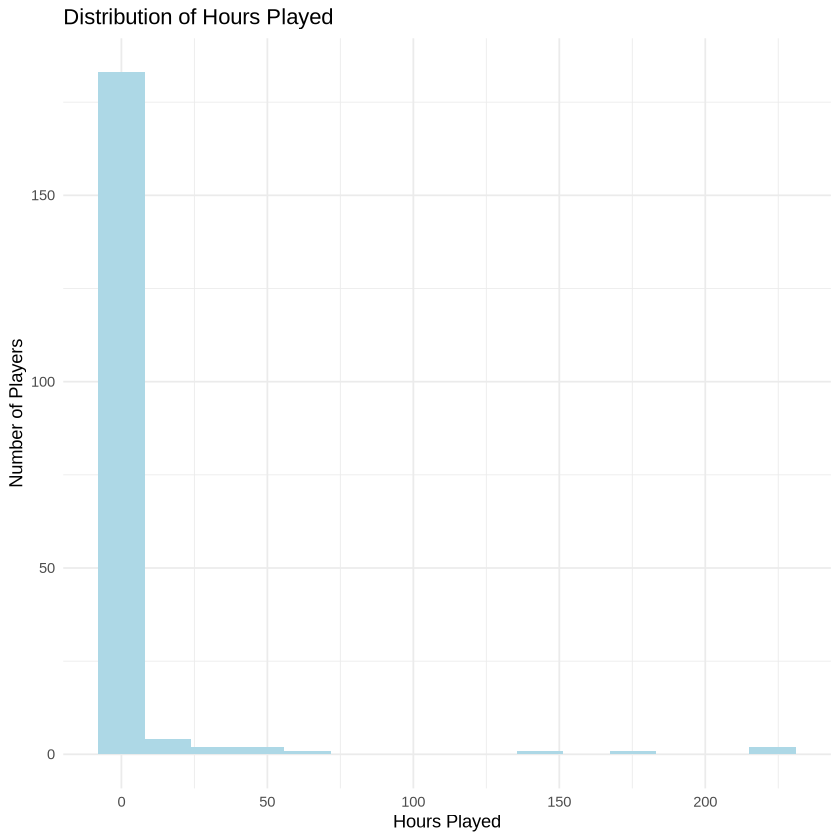

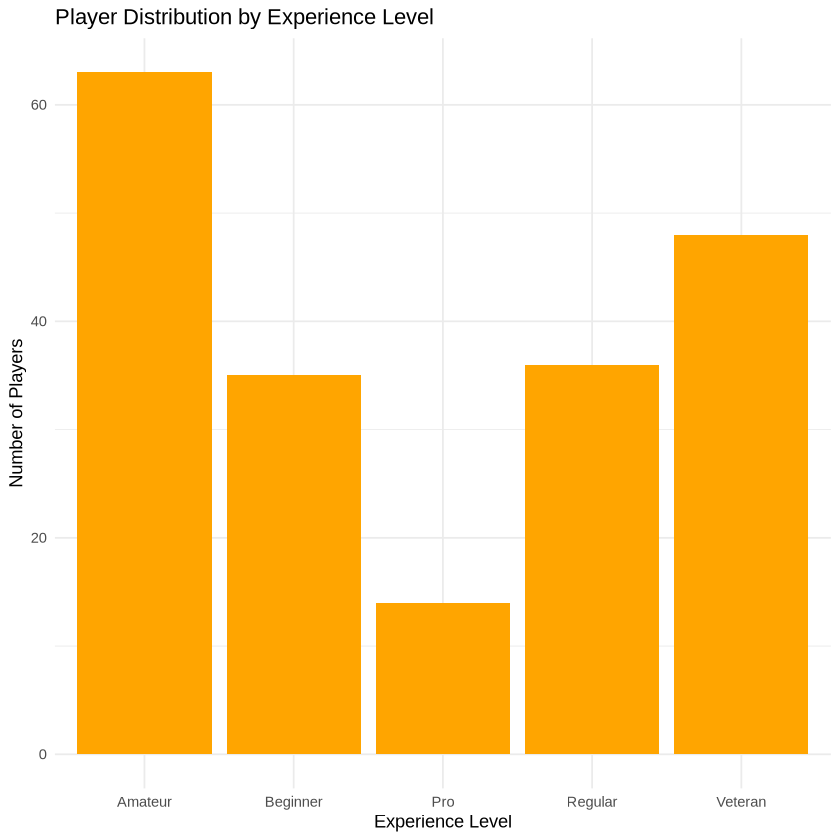

In [10]:
# Part 2: Data Exploration & Cleaning

# 1. Data Integrity Check 
print("++ DATA LINKING ANALYSIS ++")
unique_players <- unique(players$hashedEmail)
unique_sessions_players <- unique(sessions$hashedEmail)
print(paste("Unique players in players dataset:", length(unique_players)))
print(paste("Unique players in sessions dataset:", length(unique_sessions_players)))



# 2. Basic Player Data Analysis
print("++ PLAYER DATA ANALYSIS ++")
print("Players dataset summary statistics:")
players_summary <- players |>
  summarize(
    avg_age = mean(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE),
    avg_played_hours = mean(played_hours, na.rm = TRUE),
    max_played_hours = max(played_hours, na.rm = TRUE),
    min_played_hours = min(played_hours, na.rm = TRUE)
  )
print(players_summary)

# 5. Simple Visualizations

# Plot 1: distribution of play hours
plot1 <- players |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(bins = 15, fill = "lightblue") +
  labs(title = "Distribution of Hours Played",
       x = "Hours Played", 
       y = "Number of Players") +
  theme_minimal()

plot1

# Plot 2: Experience levels distribution
plot2 <- players |>
  ggplot(aes(x = experience)) +
  geom_bar(fill = "orange") +
  labs(title = "Player Distribution by Experience Level",
       x = "Experience Level", 
       y = "Number of Players") +
  theme_minimal()

plot2


Some Insights from Data:

Players Engagement Distribution - A super large majority (around 95%) of people only play less than 20 hours, and only a small group of people are reallly dedicated with times over 100 hours.

Experiences Distribution - Amateur players has the largest group (around 60 players), and then Veterans (around 50), Beginners and Regulars (both around 35), and Pros (around 15), this means intermediate players are attracted in this game rather than people who spend too much time on this.

Data Collection - Only 125 of 196 registered players have session data, showing a big gap between registration and actual participation, which affects data itself.

Average Player Profile - Basically players are approximately 21 years old with 5.85 average play hours, it shows that young people who have moderate gaming engagement levels love to play.


Part 3. Predictive Question Choice

Predictive Question: "Can players information (ie age, gender, experience level) predict which players will have higher session frequency than average?"

My Methods and Plans:
Firstly, I would use knn classification, it is appropriate because we are predicting a two-sides outcome (higher or lower than the average), by using categorical and numerical predictors, therefore this can be a good example of knn model. I will test different values of K (neighbors) and choose the one that is most accurate. I will separate my data into 70% for training and 30% for testing, and use the training set to build the model and the testing set to check how it works in real life. This method allows me to determine if a player characteristics can reliably identify as a high frequency people or not.

To begin, we will write code to create our two sides target variable (high frequency player) and prepare the predictor variables (age, gender, experience) for KNN classification with some basic data wrangling.

Part 4. Wrangling and Exploratory Analysis

In [11]:
# Part 4.1: Create two sides Response Variable for High Frequency Players

# Calculate total sessions per player
session_counts <- sessions |>
  group_by(hashedEmail) |>
  summarize(total_sessions = n())

# Calculate the median sessions to define "high-frequency"
median_sessions <- session_counts |>
  summarize(median_sessions = median(total_sessions)) |>
  pull(median_sessions)

print(median_sessions)

# Create the high frequency players
session_counts <- session_counts |>
  mutate(high_frequency_player = total_sessions > median_sessions)

# Check the distribution
frequency_summary <- session_counts |>
  group_by(high_frequency_player) |>
  summarize(count = n())

print("Distribution of high vs low frequency players:")
print(frequency_summary)

[1] 1
[1] "Distribution of high vs low frequency players:"
# A tibble: 2 × 2
  high_frequency_player count
  <lgl>                 <int>
1 FALSE                    81
2 TRUE                     44


Above thing shows that the median session count is only 1, with 44 players classified as high frequency (above median) and 81 as low frequency.

In [12]:
# Part 4.2: Merge Data - Simple Version

# Get the list of high frequency player emails
high_freq_emails <- session_counts |>
  filter(high_frequency_player == TRUE) |>
  select(hashedEmail)

# Create analysis dataset and add frequency
analysis_data <- players |>
  select(hashedEmail, Age, gender, experience, played_hours)|>
  mutate(high_frequency_player = hashedEmail %in% high_freq_emails$hashedEmail)

# Check the results
print("High frequency player count in final data:")
analysis_data |>
  group_by(high_frequency_player) |>
  summarize(count = n())

head(analysis_data,7)

[1] "High frequency player count in final data:"


high_frequency_player,count
<lgl>,<int>
FALSE,152
TRUE,44


hashedEmail,Age,gender,experience,played_hours,high_frequency_player
<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,9,Male,Pro,30.3,TRUE
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,17,Male,Veteran,3.8,TRUE
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,17,Male,Veteran,0.0,FALSE
23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,21,Female,Amateur,0.7,FALSE
7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,21,Male,Regular,0.1,FALSE
f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,17,Female,Amateur,0.0,FALSE
8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,19,Female,Regular,0.0,FALSE


Above things show that it contains 196 players with 44 classified as high frequency people and 152 as low frequency.

In [13]:
# Part 4.3: Exploratory Analysis

# Check experience levels by frequency
print("Experience levels of high vs low frequency players:")
analysis_data |>
  group_by(experience, high_frequency_player) |>
  summarize(count = n())

# Check average age by frequency
print("Average age by frequency category:")
analysis_data |>
  group_by(high_frequency_player) |>
  summarize(avg_age = mean(Age))

[1] "Experience levels of high vs low frequency players:"


`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,high_frequency_player,count
<chr>,<lgl>,<int>
Amateur,FALSE,48
Amateur,TRUE,15
Beginner,FALSE,27
Beginner,TRUE,8
Pro,FALSE,11
Pro,TRUE,3
Regular,FALSE,26
Regular,TRUE,10
Veteran,FALSE,40


[1] "Average age by frequency category:"


high_frequency_player,avg_age
<lgl>,<dbl>
FALSE,NA
TRUE,19.61364


Above things show that high frequency players tend to be younger (average age 19.6) and are distributed across all experience levels (since number of players are distributed in every experience), Amateur players has the highest counts in both frequency categories.

In [14]:
# Part 4.4: Prepare for KNN

# Select only the variables we need for modeling
model_data <- analysis_data |>
  select(Age, gender, experience, high_frequency_player)

# Remove rows with missing values
model_data <- model_data |>
  filter(!is.na(Age))

print("Final model dataset ready for KNN:")
print(model_data)
print("Target variable distribution:")
table(model_data$high_frequency_player)

[1] "Final model dataset ready for KNN:"
# A tibble: 194 × 4
     Age gender experience high_frequency_player
   <dbl> <chr>  <chr>      <lgl>                
 1     9 Male   Pro        TRUE                 
 2    17 Male   Veteran    TRUE                 
 3    17 Male   Veteran    FALSE                
 4    21 Female Amateur    FALSE                
 5    21 Male   Regular    FALSE                
 6    17 Female Amateur    FALSE                
 7    19 Female Regular    FALSE                
 8    21 Male   Amateur    FALSE                
 9    47 Male   Amateur    FALSE                
10    22 Female Veteran    FALSE                
# ℹ 184 more rows
[1] "Target variable distribution:"



FALSE  TRUE 
  150    44 

The final dataset contains 194 observations with 44 high frequency players and 150 low frequency players. Age, gender, and experience are as predictors for KNN classification in the next part.

Part 5. KNN Classification and Visualizations

In [15]:
# Load required libraries
library(tidymodels)
library(ggplot2)

# Part 5.1: Create recipe for data preprocessing
game_recipe <- recipe(high_frequency_player ~ Age + gender + experience, 
                      data = model_data) |>
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())

# Part 5.2: Specify KNN model
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Part 5.3: Create workflow
knn_workflow <- workflow() |>
  add_recipe(game_recipe) |>
  add_model(knn_spec)


print("KNN workflow created successfully!")

[1] "KNN workflow created successfully!"


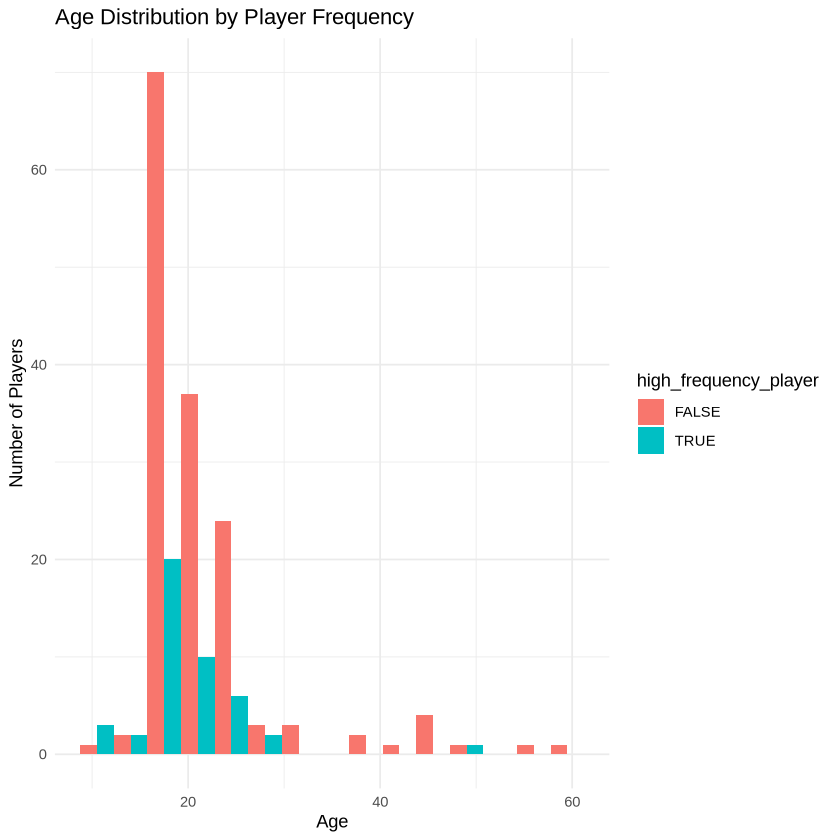

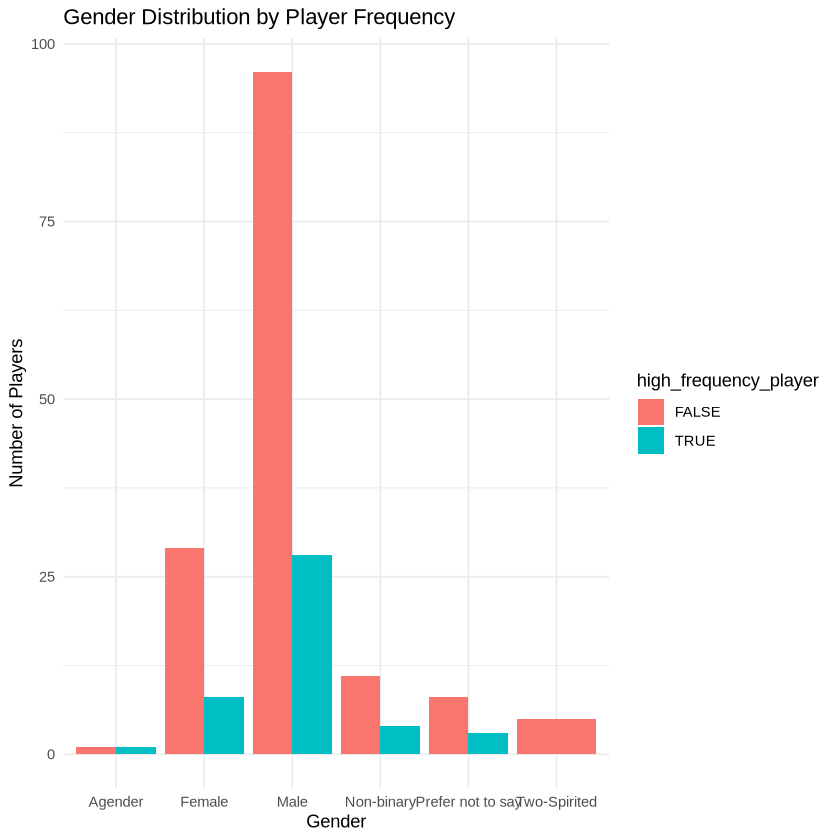

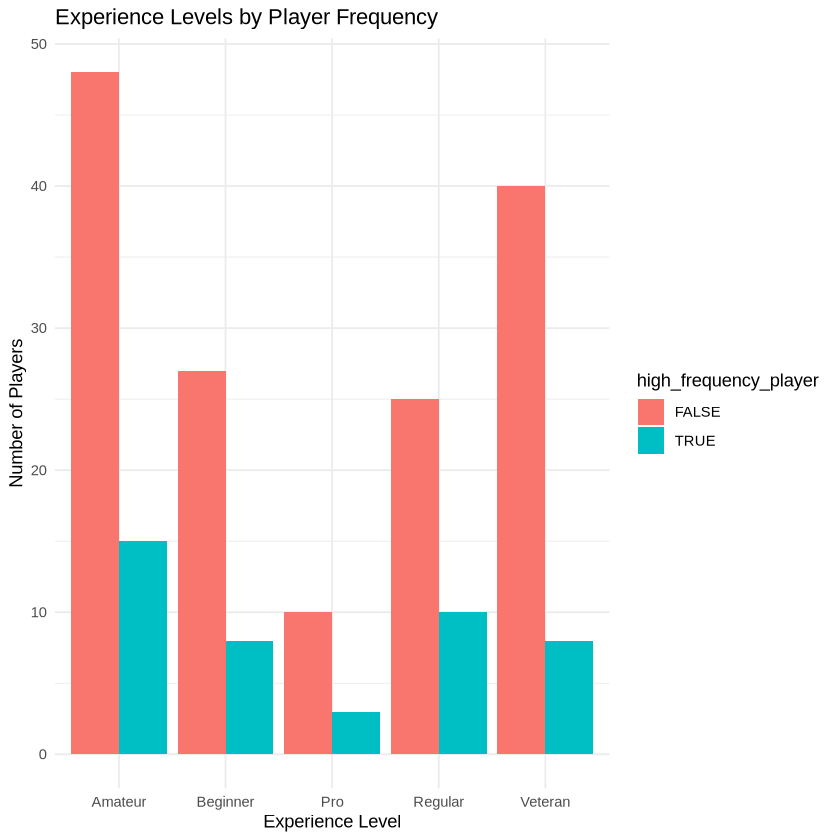

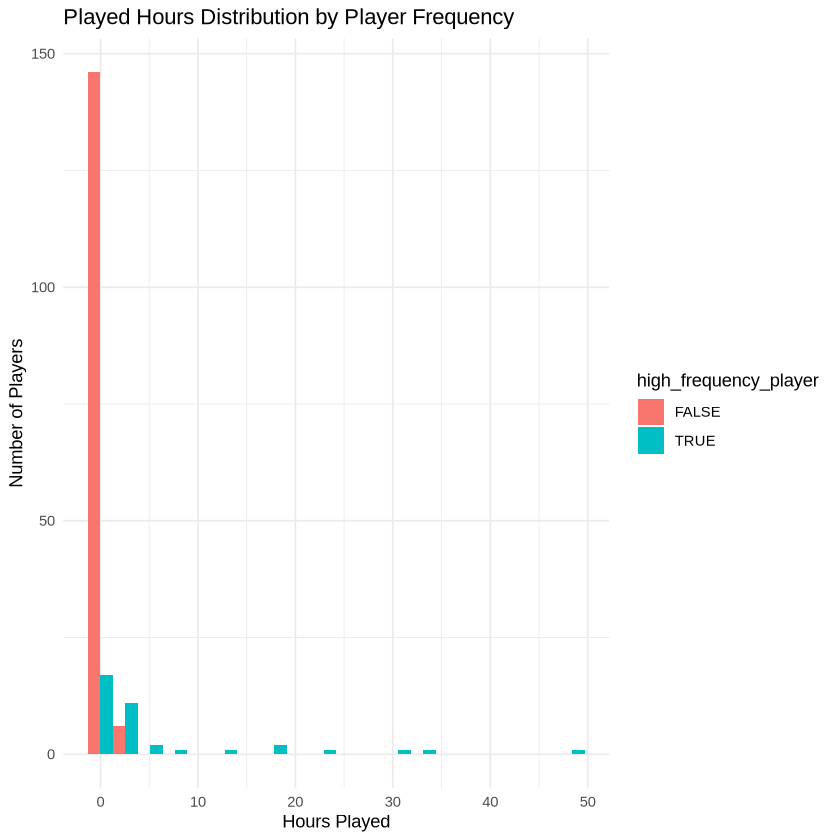

In [16]:
# Step 5: Comprehensive Visualization Analysis

# Plot 1: Age vs High Frequency Players - Histogram
plot_age <- ggplot(model_data, aes(x = Age, fill = high_frequency_player)) +
  geom_histogram(position = "dodge", bins = 15) +
  labs(title = "Age Distribution by Player Frequency",
       x = "Age", 
       y = "Number of Players") +
  theme_minimal()

# Plot 2: Gender vs High Frequency Players - Bar
plot_gender <- model_data |>
  ggplot(aes(x = gender, fill = high_frequency_player)) +
  geom_bar(position = "dodge") +
  labs(title = "Gender Distribution by Player Frequency",
       x = "Gender", 
       y = "Number of Players") +
  theme_minimal()

# Plot 3: Experience Level vs High Frequency Players - Bar  
plot_experience <- model_data |>
  ggplot(aes(x = experience, fill = high_frequency_player)) +
  geom_bar(position = "dodge") +
  labs(title = "Experience Levels by Player Frequency",
       x = "Experience Level", 
       y = "Number of Players") +
  theme_minimal()

# Plot 4: Played Hours vs High Frequency Players - Histogram
plot_hours <- analysis_data |>
  filter(played_hours < 50) |>
  ggplot(aes(x = played_hours, fill = high_frequency_player)) +
  geom_histogram(position = "dodge", bins = 20) +
  labs(title = "Played Hours Distribution by Player Frequency",
       x = "Hours Played", 
       y = "Number of Players") +
  theme_minimal()

# Display all plots
print(plot_age)
print(plot_gender)
print(plot_experience)
print(plot_hours)

Part 6. Analysis and Conclusions

Age Plot: High frequency players mostly are concentrated in younger age groups (around 20s) compared to low frequency players.

Gender Plot: Male players show the higher proportion of high-frequency players across all different gender categories.

Experience Plot: High frequency players are evenly distributed across different experiences, but Amateur and Regular players have the higher counts of high frequency players.

Hours Plot: High-frequency players show a wider distribution of play hours, with many playing 10-30 hours.

Answer to my Predictive Question: "Can players information (ie age, gender, experience level) predict which players will have higher session frequency than average?"
Yes, player information can predict high session frequency. Younger players (about 20s) and male players give higher possibility to become a high frequency contributors, and Amateur and Veteran experience  are most likely to be the levels associated with this high frequency group, but a strange relationship is that play hours under 5 hours is seen to be high frequency. These characteristics provide reliable predictors for checking players likely to generate large amount of data.

I did not use the "subscribe" variable because newsletter subscription thing relates to marketing engagement rather than actual gameplay time or activities status contribution, so "subscribe" factor is not what we focused in my selected question. The timing data (like start_time, end_time) was also not used because we already captured the important information through total_sessions count. These choices keep my analysis focusing on player demographic and characteristics, that directly predict engagement patterns rather than activities.

Answer to Broad Question: Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Similarly, my analysis identifies "kinds" of players most likely to contribute large data amounts, which are having younger male players around 20, with either Amateur or Veteran experience levels, and who play less than 5 hours. These types of people should be targeted in recruitment efforts. However, there is certainly contradiction, where how most high frequency players can't even play over 5 hours, so no clear relationship between factors are shown. It solves the CPSC research group's need to optimize their recruiting strategy for maximum data collection.

My analysis successfully identified characteristics of players as the most likely high data contributors, providing clear criteria for recruitment efforts, which basically solves the problem. The predictive modeling method shows that people population can reliably predict session frequency to optimize data collection strategies.